# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [5]:
# TODO: Import dataset and inspect the first five columns
seeds_data = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
seeds_data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [6]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = seeds_data.iloc[:, :-1]  # All rows, all columns except the last one
y = seeds_data.iloc[:, -1]   # All rows, only the last column

# Print shape of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (210, 7)
Shape of y (target): (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*I am selecting StandardScaler from sklearn. It's an effective choice for scaling data before PCA and clustering because it normalizes each feature to have a mean of 0 and unit variance, ensuring that all features contribute equally regardless of their original scale. This is important for PCA, which is sensitive to the variance of the data, and for clustering algorithms where feature scaling affects distance calculations. StandardScaler helps limit biases towards high-variance features and enhances the overall performance of PCA and clustering.*


Before we implement the scaler, we need to split the data into training and testing sets first.

In [7]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# Here, we are using a common split ratio of 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train (training features):", X_train.shape)
print("Shape of y_train (training target):", y_train.shape)

Shape of X_train (training features): (147, 7)
Shape of y_train (training target): (147,)


Now that we have our training data, we can implement our selected scaler.

In [9]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fits the scaler to the training data and transforms training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforms the testing data with the same scaler
X_test_scaled = scaler.transform(X_test)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [11]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

# Instantiating the Logistic Regression model
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [12]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [15]:
from sklearn.model_selection import GridSearchCV

#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
# Creating the GridSearchCV object with Logistic Regression model and parameter grid

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)  

# Fitting grid search to training data
grid_search.fit(X_train_scaled, y_train)

# extracting best parameters and cross-val score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

# Evaluating model on test data
test_score = grid_search.score(X_test_scaled, y_test)

# Print best parameters, best cross-val score, test score
print("Best parameters:", best_params)
print("Best CV Score:", best_cv_score)
print("Test Score:", test_score)

Best parameters: {'C': 10.0, 'fit_intercept': True}
Best CV Score: 0.9593103448275861
Test Score: 0.9206349206349206


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [17]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)



In [18]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Using PCA to reduce to 2 dimensions
X_test_pca = pca.fit_transform(X_test_scaled)


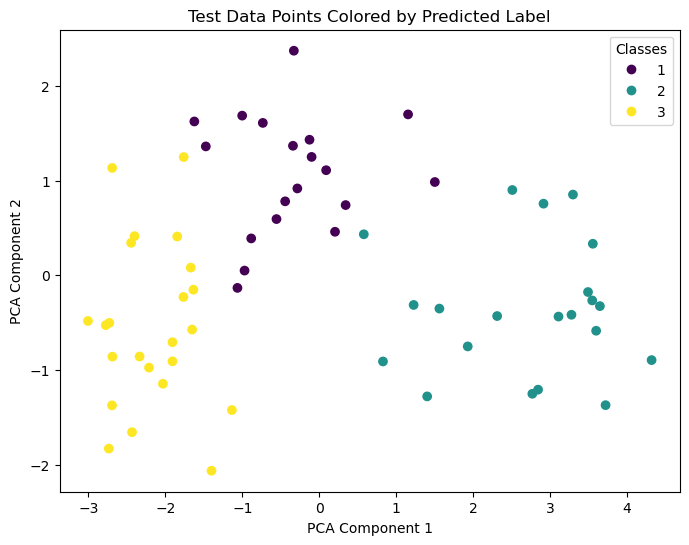

In [19]:
# TODO: Plot test points colored by predicted label

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('Test Data Points Colored by Predicted Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*1. I think the logistic regression model worked very well for this dataset. This conclusion is based on the plot and how distinctly separated the 3 classes seem to be. It's difficult to tell whether there is any overlap at all, as some predicted class 1 members are in close proximity to both class 3 and class 2 predicted points, but it does still appear like there is a strong separation at the least. It would be interesting to see how a more complex model would compare.*

*2. PCA also seemed to work well. The 2-dimensional representation clearly reveals distinct clusters of the respective predicted classes. When different colored dots are not intermingled, it means the model is doing a good job distinguishing between classes, as is clearly demonstrated in this plot.*


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

*I referred to a few of the past examples in this class, like the Scaling notebook and the Lab 8 example.*

2. In what order did you complete the steps?

*I completed the steps in order.*

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

*To be honest I forgot the syntax for generating a plot so I confided in ChatGPT to help me fix that one section.*

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*No, not really. This was relatively straightforward.*

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [20]:
# TODO: Scale feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

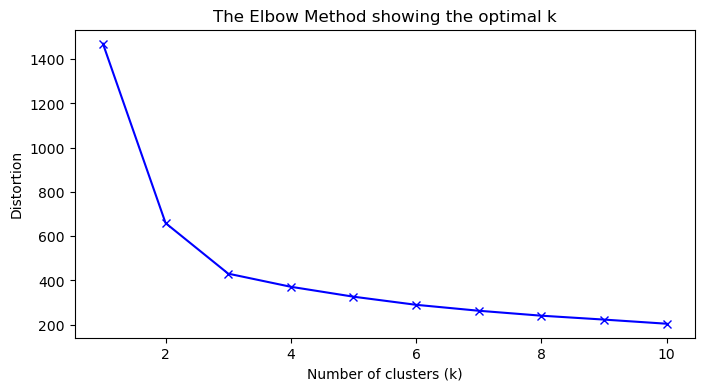

In [24]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans

distortions = []
K = range(1, 11)  # Testing 1 to 10 clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42) ##set n_init to 10 to suppress warning
    kmeanModel.fit(X_scaled)
    distortions.append(kmeanModel.inertia_)
    
# Plotting distortions to visualize the elbow
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [25]:
# TODO: Implement K-means with the number of clusters determined in the previous step
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Replace 'optimal_k' with the number of clusters you determined using the elbow method
optimal_k = 3 ## this is where the plot starts to flatten.

# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [26]:
# TODO: Calculate the three different validation metrics
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)

# Printing the validation metrics
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

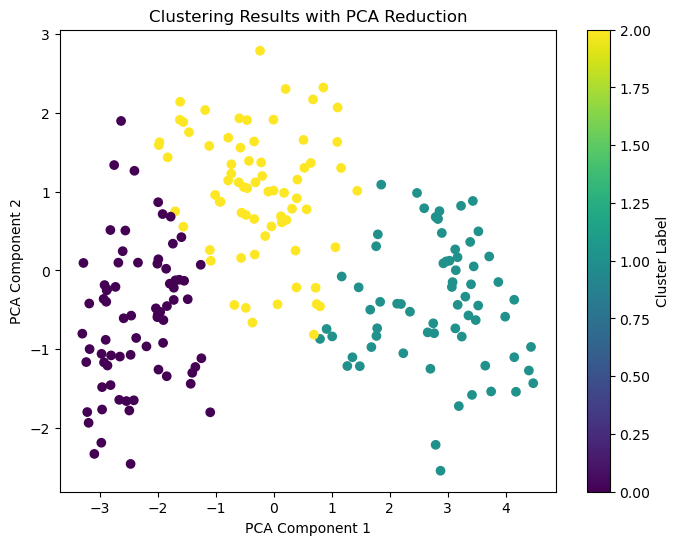

In [27]:
# TODO: Plot clustering results
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# We will use PCA to reduce our scaled data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Use the labels from the KMeans model to color the data points
cluster_labels = kmeans.labels_

# Plotting the PCA-reduced data colored by cluster label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering Results with PCA Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [28]:
# TODO: Find the number of principal components using explained variance ratio
from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, total_variance in enumerate(explained_variance) if total_variance >= 0.95) + 1


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [29]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_pca.fit(X_pca)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [41]:
# TODO: Calculate the three different validation metricsd
silhouette_avg_pca = silhouette_score(X_pca, kmeans_pca.labels_)
calinski_harabasz_pca = calinski_harabasz_score(X_pca, kmeans_pca.labels_)
davies_bouldin_pca = davies_bouldin_score(X_pca, kmeans_pca.labels_)

print(f"Number of components: {n_components}")
print(f"Silhouette Score (PCA): {silhouette_avg_pca}")
print(f"Calinski-Harabasz Score (PCA): {calinski_harabasz_pca}")
print(f"Davies-Bouldin Score (PCA): {davies_bouldin_pca}")

Number of components: 3
Silhouette Score (PCA): 0.4100823639350389
Calinski-Harabasz Score (PCA): 260.28850656356855
Davies-Bouldin Score (PCA): 0.9030688438741864


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [43]:
# TODO: Display results

data = {
    'Validation Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [0.40072705527512986, 249.7841749161647, 0.9278712249013426],
    'PCA Transformed Data': [0.4100823639350389, 260.28850656356855, 0.9030688438741864]
}

# Creating a DataFrame
results_table = pd.DataFrame(data)

# Setting 'Validation Metric' as the index
results_table.set_index('Validation Metric', inplace=True)

# Display the DataFrame as a table
results_table

,Original Data,PCA Transformed Data
Validation Metric,,
Silhouette Score,0.400727,0.410082
Calinski-Harabasz Score,249.784175,260.288507
Davies-Bouldin Score,0.927871,0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*

*Yes, the optimal number of clusters was 3, which makes sense given the context of classifying different types of wheat. This aligns with our prediction of distinct varieties, which ideally would generate distinct groups based on their kernel characteristics.*

2. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*

*The PCA plots from Part 1 and Part 2 indicate similar clustering patterns, with data points grouped in distinct regions. However, the clusters in the plot from Part 2 (PCA-transformed data) appear to be more compact, which suggests improved cluster quality after PCA transformation. This observation aligns with the slight improvements in the validation metrics from part 1 to part 2.*

3. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

*The PCA plots from Part 1 and Part 2 show a consistent clustering structure, with data points forming clear groupings. The second plot, using data transformed by PCA, seems to display tighter clusters, implying that PCA has helped to refine the clustering by highlighting the most significant features.*



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

*I sourced most of my code from lab examples and lecture notes.*

2. In what order did you complete the steps?

*In the same order as the steps.*

3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

*Yes, to generate my table as I was having some issues at first.*

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*I felt that it was pretty straightforward with the reference slides.*

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*I really enjoy the visualization technique applied by PCA. It's interesting to see the data clearly distinguished by clusters. It took a while to kind of wrap my head around PCA, but once I did, I could appreciate it as an interesting unsupervised machine learning algorithm.*